First some imports needed later...

In [1]:
import trompy as tp
import matplotlib.pyplot as plt

Run this cell first to read in data from the metafiles and FED files to a master dictionary called 'mice'.

In [2]:
%run ..//source//FED_functions.py

File is excel file. Making csv metafile first
File is excel file. Making csv metafile first
File is excel file. Making csv metafile first


The keys in this dictionary are the individual mice in the experiment.

In [3]:
mice.keys()

dict_keys(['FEDXA01', 'FEDXA02', 'FEDXA03', 'FEDXA04', 'FEDXA05', 'FEDXA06', 'FEDXA07', 'FEDXA08', 'FEDXA09', 'FEDXA10', 'FEDXA11', 'FEDXA12'])

Each key (mouse) contains a sub-dictionary where the keys represent different data and details read from the metafiles and FED files.

In [4]:
mice["FEDXA01"].keys()

dict_keys(['sex', 'order', 'grain_timestamps', 'pr_timestamps', 'nr_timestamps', 'bodyweight', 'hoarding', 'grain_avg_pellets', 'pr_avg_pellets', 'nr_avg_pellets', 'grain_pellets_per_day', 'pr_pellets_per_day', 'nr_pellets_per_day', 'all_pellets_per_day', 'intermeal_interval_pr', 'mealsize_pr', 'intermeal_interval_nr', 'mealsize_nr'])

There is a function called ´get_data_fields´ that allows different fields so be extracted from the dictionary using a *selector* dictionary (e.g. so the only male mice can be retrieved).

Arguments required are:
* dictionary - Name of the dictionary to be interrogated. In this case, mice.
* fields - List of fields to be extracted.
* selector - Dictionary with keys and values that will be used for selection

In [8]:
get_data_fields?

Signature: get_data_fields(dictionary, fields, selectors)
Docstring: <no docstring>
File:      c:\github\fedprotein\source\fed_functions.py
Type:      function


For example, this code in the next cell retrieves meal sizes for all MALE mice while they are on non-restricted pellets


In [5]:
selector_dictionary = {"sex": "M"}
data = get_data_fields(mice, ["mealsize_nr"], selector_dictionary)

print(data)

12 items in output dictionary
[4.461111111111111, 3.5885558583106265, 4.965, 4.857954545454546, 3.911504424778761, 3.2327188940092166, 4.135220125786163, 3.6376404494382024, 3.805157593123209, 3.783422459893048, 3.0043763676148796, 3.0797413793103448]


The code in the next cell retrieves data for intermeal intervals for NR and PR pellets from MALE mice in ORDER 2 (i.e. PR-NR).

Note, because multiple fields are given to be retrieved the output is a list-of-lists.

In [6]:
selector_dictionary = {"sex": "M", "order": 2}
data = get_data_fields(mice, ['intermeal_interval_nr', 'intermeal_interval_pr'], selector_dictionary)

print(data)

6 items in output dictionary
[[0.4507708333333333, 0.4421192854980318, 0.4026645833333339, 0.46078440656565695, 0.35742994100295, 0.37571812596006143], [0.30308006535947696, 0.3161212998712999, 0.27009471766848797, 0.30469542362399493, 0.2675567356572261, 0.22796219455970468]]


You can then go on and make figures if various ways using code to select the different groups quite efficiently. For example by setting up a selector dictionary to retrieve a certain group of mice.

The selectors below will get the male nrpr and prnr mice, respectively.

In [7]:
nrpr_male_selector = {"order": 1, "sex": "M"}
prnr_male_selector = {"order": 2, "sex": "M"}

In [8]:
nrpr_all_pellets = get_data_fields(mice, ["all_pellets_per_day"], nrpr_male_selector)

print(nrpr_all_pellets)

6 items in output dictionary
[[283, 269, 193, 177, 189, 181, 165, 182, 205, 189, 142, 167, 168, 188, 198, 201, 196], [305, 233, 223, 168, 208, 208, 170, 162, 182, 182, 133, 149, 151, 150, 174, 145, 165], [302, 192, 191, 163, 167, 178, 192, 197, 193, 211, 151, 188, 201, 211, 242, 255, 176], [199, 267, 214, 171, 200, 214, 205, 208, 207, 187, 153, 160, 193, 187, 192, 189, 200], [307, 249, 226, 204, 164, 197, 208, 195, 183, 188, 149, 84, 211, 234, 225, 251, 231], [237, 201, 224, 197, 198, 191, 188, 192, 215, 217, 169, 239, 257, 261, 244, 217, 233]]


Here is an example of a simple script that could be used to make timeline-style figures.

6 items in output dictionary
6 items in output dictionary


Text(0, 0.5, 'Pellets delivered')

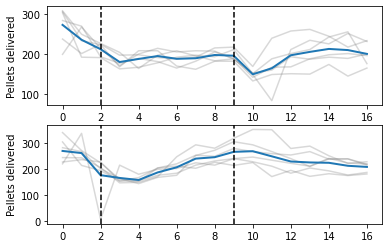

In [9]:
# total pellets
def timeline_fig(data, ax=[], ylabel="", **kwargs):
    if ax == []:
        f, ax = plt.subplots() #could check if ax is axis object
    
    for trace in data:
        ax.plot(trace, color="grey", alpha=0.3)
    ax.plot(np.mean(data, axis=0), linewidth=2)

    ax.set_ylabel(ylabel)
    ax.axvline(2, linestyle="--", color="k")
    ax.axvline(9, linestyle="--", color="k")

    return ax

# these lines retrieve the data from the master dictionary
nrpr = get_data_fields(mice, ["all_pellets_per_day"], nrpr_male_selector)
prnr = get_data_fields(mice, ["all_pellets_per_day"], prnr_male_selector)

# this line initialises the figure and axes
f, ax = plt.subplots(nrows=2)

# these lines use the above function to plot the data that was retrieved in separate axes
timeline_fig(nrpr, ax=ax[0])
timeline_fig(prnr, ax=ax[1], ylabel= "Pellets delivered")

# extra lines can be used here to customise the plots
ax[0].set_ylabel("Pellets delivered")

Here is an example of how to retrieve multiple fields (nr pellets and pr pellets) and make a nice barscatter that can be modified afterwards.

6 items in output dictionary
6 items in output dictionary
<BarContainer object of 1 artists>
<BarContainer object of 1 artists>


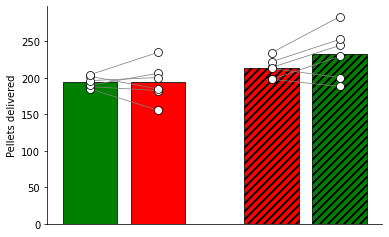

In [18]:
nrpr_avg = get_data_fields(mice, ["nr_avg_pellets", "pr_avg_pellets"], nrpr_male_selector)
prnr_avg = get_data_fields(mice, ["pr_avg_pellets", "nr_avg_pellets"], prnr_male_selector)


f, ax = plt.subplots()
_, _, barlist, _ = tp.barscatter([nrpr_avg, prnr_avg], ax=ax, paired=True,
barfacecolor_option="individual", barfacecolor=["green", "red", "red", "green"])
ax.set_ylabel("Pellets delivered")
plt.rcParams["hatch.linewidth"] = 2
# this code puts hatching on bars 3 and 4 
for i in [barlist[2], barlist[3]]:
    print(i)
    bar = i.get_children()
    bar[0].set_hatch("///")

# f.savefig(figsfolder + "pellets_eaten.pdf")

6 items in output dictionary
6 items in output dictionary
<BarContainer object of 1 artists>
<BarContainer object of 1 artists>


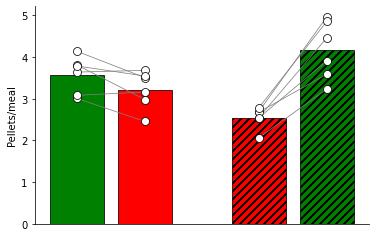

In [19]:
nrpr_avg = get_data_fields(mice, ["mealsize_nr", "mealsize_pr"], nrpr_male_selector)
prnr_avg = get_data_fields(mice, ["mealsize_pr", "mealsize_nr"], prnr_male_selector)


f, ax = plt.subplots()
_, _, barlist, _ = tp.barscatter([nrpr_avg, prnr_avg], ax=ax, paired=True,
barfacecolor_option="individual", barfacecolor=["green", "red", "red", "green"])
ax.set_ylabel("Pellets/meal")
plt.rcParams["hatch.linewidth"] = 2
# this code puts hatching on bars 3 and 4 
for i in [barlist[2], barlist[3]]:
    print(i)
    bar = i.get_children()
    bar[0].set_hatch("///")

# f.savefig(figsfolder + "pellets_eaten.pdf")